### MySQLdb 연동

In [1]:
import MySQLdb

In [2]:
#data_load
db = MySQLdb.connect(
    host="52.78.107.76",
    user="root",
    passwd="dss",
    db="book",
    charset="utf8")

db

<_mysql.connection open to '52.78.107.76' at 00000232EEFED8F8>

### dataset 저장

In [3]:
Query = """
   USE book

    alter table review
    default character set utf8 collate utf8_general_ci;
    
    LOAD DATA LOCAL INFILE "C:/Users/shine/Desktop/code/6. mysql/df_review.txt" 
    INTO TABLE review
    CHARACTER SET UTF8
    FIELDS TERMINATED BY ','
    ENCLOSED BY ""
    LINES TERMINATED BY '\n'(ID, ISBN, grade, review); 
"""

In [4]:
Query = """
    SHOW TABLES;
"""

In [5]:
curs = db.cursor()
curs.execute(Query)

3

In [6]:
Query = """
    Select *
    From book_info
"""

df_book_info = pd.read_sql(Query, db)
df_book_info.head()

,category,ranking,seogi_nl_clear,ISBN,title,author,publisher,price,width,length,thick,weight,page
0,0,0,0,ISBN,title,author,publisher,0,0,0,0,0,0
1,3,121,3810,9788937437496,인연,피천득,민음사,15000,122,191,17,262,300
2,5,148,13910,9791129706126,"""최태성 한국사능력검정시험: 심화(1",2,"3급)""",0,0,22000,188,257,19
3,5,143,3900,9788901240114,다시 쓰는 여성 세계사,매기 앤드루스,웅진지식하우스,19800,149,215,36,624,456
4,1,117,3810,9788956609959,종의 기원,정유정,은행나무,13000,150,210,30,519,384


In [7]:
Query = """
    Select *
    From review
"""

df_review = pd.read_sql(Query, db)
df_review.head()

,ID,ISBN,grade,review
0,ID,ISBN,0.0,review
1,ah**a0811,9791130627878,4.0,"""내가 원하는것을 모르고 살았던 것이 맞았다.\r"
2,그저 한줄기 빛을 보며 그것이 내가 원하는 것을\r,None,NaN,None
3,채워주는 줄,그렇게 살았는데 이 책,NaN,None
4,진정 나 자신이 무엇을 원하는지를 알게 되었다.\r,None,NaN,None


### book data, review data 를 book_concat View로 생성

In [8]:
Query = """
    CREATE VIEW book_concat as (
    SELECT book_info.*,avg_grade, review_cnt 
    FROM book_info
    JOIN (SELECT ISBN, round(AVG(grade)) AS avg_grade, COUNT(*) AS review_cnt
        FROM review
        WHERE ISBN IS NOT NULL
        AND grade IS NOT NULL
        AND grade != 0
        GROUP BY ISBN 
        HAVING avg_grade < 6) AS filter_review
ON book_info.ISBN = filter_review.ISBN
)
"""

In [9]:
Query = """
    Select *
    From book_concat 
"""

In [10]:
df_all = pd.read_sql(Query, db)
df_all

,category,ranking,seogi_nl_clear,ISBN,title,author,publisher,price,width,length,thick,weight,page,avg_grade,review_cnt
0,3,121,3810,9788937437496,인연,피천득,민음사,15000,122,191,17,262,300,4.0,1
1,5,148,13910,9791129706126,"""최태성 한국사능력검정시험: 심화(1",2,"3급)""",0,0,22000,188,257,19,3.0,2
2,5,143,3900,9788901240114,다시 쓰는 여성 세계사,매기 앤드루스,웅진지식하우스,19800,149,215,36,624,456,4.0,8
3,1,117,3810,9788956609959,종의 기원,정유정,은행나무,13000,150,210,30,519,384,4.0,17
4,1,143,3810,9788936477936,"""알로하","나의 엄마들""",이금이,0,14800,142,203,31,521,4.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,21,46,3230,9788996767923,마지막 신호,David Cha,도서출판 KAM,12000,152,223,20,396,249,4.0,4
1503,21,49,3230,9788932816425,내면세계의 질서와 영적 성장,고든 맥도날드,IVP,15000,141,201,18,417,344,4.0,18
1504,21,40,3230,9788982641411,도올의 마가복음 강해,도올 김용옥,통나무,28000,179,248,48,1243,612,4.0,2
1505,21,48,3230,9788953135925,팀 켈러의 인생질문,팀 켈러,두란노서원,14000,141,207,20,348,272,4.0,10


In [11]:
Query = """
     Select publisher, count(title) as bestsellor_count
     From book_concat
     Group by publisher
     Order by bestsellor_count DESC
     Limit 1, 5
"""

In [12]:
df = pd.read_sql(Query, db)
df

,publisher,bestsellor_count
0,길벗,38
1,민음사,26
2,창비,25
3,문학동네,23
4,위즈덤하우스,21


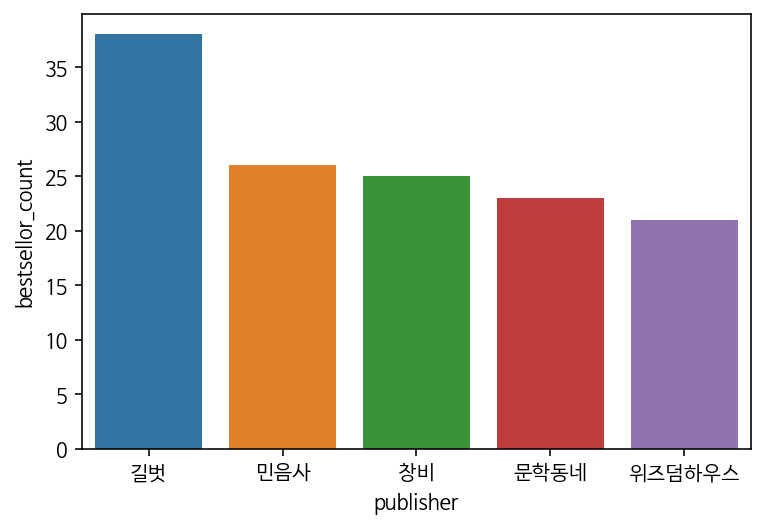

In [13]:
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
# matplotlib 한글 사용을 위한 코드
import matplotlib as mpl
from matplotlib import rc
rc('font', family='AppleGothic')
mpl.rc('font', family='Hancom Gothic')
mpl.rc('axes', unicode_minus=False)


sns.barplot(x='publisher', y='bestsellor_count', data=df)

#### 베스트셀러에 가장 많이 진입한 출판사는 (EBS한국교육방송공사) > 길벗 > 민음사 > 창비 > 문학동네 > 위즈덤하우스

In [14]:
Query = """
    Select publisher, count(title) as count, sum(price*(150-ranking)) as leverage 
    From book_concat
    Group by publisher
    Having leverage > 0
    Order by leverage DESC
    Limit 5
"""

In [15]:
df = pd.read_sql(Query, db)
df

,publisher,count,leverage
0,길벗,38,78334500.0
1,한빛미디어,19,45496000.0
2,창비,25,34352700.0
3,에듀윌,18,32096000.0
4,알에이치코리아,18,26636900.0


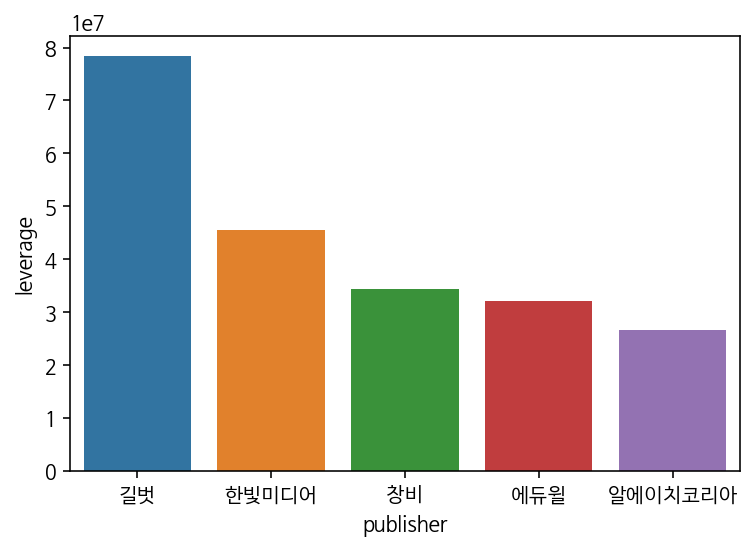

In [16]:
sns.barplot(x='publisher', y='leverage', data=df)

#### 가장 많은 판매수익을 얻은 출판사는 길벗 > 한빛미디어 > 창비 > 에듀윌 > 알에치코리아

In [33]:
Query = """
    Select ranking, ISBN, title, publisher, price, width, length,thick, weight, page, round(price/(length*thick*weight*page), 5) as paper_price, avg_grade, review_cnt
    From book_concat
    Order by paper_price DESC
    

"""

In [34]:
df = pd.read_sql(Query, db)
#df = df[30:]
df

,ranking,ISBN,title,publisher,price,width,length,thick,weight,page,paper_price,avg_grade,review_cnt
0,88,9791195708031,설민석의 첫출발 한국사 연표,휴먼큐브,6000,160,230,5,5,3,0.34783,4.0,74
1,81,9788932034942,우리가 함께 장마를 볼 수도 있겠습니다,문학과지성사,9000,129,206,10,172,1,0.02540,4.0,29
2,78,9791187824084,어여쁜 꽃말 컬러링북,아르누보,12000,231,231,7,6,72,0.01718,3.0,8
3,36,9791188073498,두산베어스 뎁스차트(2020),브레인스토어,16800,170,240,16,459,1,0.00953,4.0,6
4,36,9788977824225,꼬불꼬불 미로찾기 성경,토기장이,5500,216,262,3,28,32,0.00781,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,111,9791196327989,민준호 사회 집요한 파이널(2020),호인북스,12000,225,300,0,0,104,NaN,4.0,10
1503,94,9788937504532,믿음의 기초,네비게이토,3000,148,210,15,0,70,NaN,4.0,1
1504,60,9788964430101,성막,기쁜소식사,13000,150,221,0,0,384,NaN,4.0,1
1505,57,9788985961073,반야심경 이야기,정토출판,7000,148,210,0,0,296,NaN,4.0,6


### 페이지당 종이 단가가 너무 높은 이상치 발견
- 9791195708031(설민석의 첫출발 한국사 연표) 총 6쪽(보조교재)
- 9788932034942(우리가 함께 장마를 볼 수도 있겠습니다) 총 1쪽(사이트 정보 게재 오류)
- 9791188073498(두산베어스 뎁스차트(2020)) 총 1쪽(사이트 정보 게재 오류) 


In [35]:
import warnings
warnings.filterwarnings(action='ignore')

# max, 이상치 삭제
df['error'] = ""

for i in range(len(df)):
    if df['paper_price'][i] == 0.34783:
        df['error'][i] =  'Y'
    elif df['paper_price'][i] == 0.02540:
        df['error'][i] =  'Y'
    elif df['paper_price'][i] == 0.00953:
        df['error'][i] =  'Y'
    else:
        df['error'][i] = 'N'

df

,ranking,ISBN,title,publisher,price,width,length,thick,weight,page,paper_price,avg_grade,review_cnt,error
0,88,9791195708031,설민석의 첫출발 한국사 연표,휴먼큐브,6000,160,230,5,5,3,0.34783,4.0,74,Y
1,81,9788932034942,우리가 함께 장마를 볼 수도 있겠습니다,문학과지성사,9000,129,206,10,172,1,0.02540,4.0,29,Y
2,78,9791187824084,어여쁜 꽃말 컬러링북,아르누보,12000,231,231,7,6,72,0.01718,3.0,8,N
3,36,9791188073498,두산베어스 뎁스차트(2020),브레인스토어,16800,170,240,16,459,1,0.00953,4.0,6,Y
4,36,9788977824225,꼬불꼬불 미로찾기 성경,토기장이,5500,216,262,3,28,32,0.00781,4.0,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,111,9791196327989,민준호 사회 집요한 파이널(2020),호인북스,12000,225,300,0,0,104,NaN,4.0,10,N
1503,94,9788937504532,믿음의 기초,네비게이토,3000,148,210,15,0,70,NaN,4.0,1,N
1504,60,9788964430101,성막,기쁜소식사,13000,150,221,0,0,384,NaN,4.0,1,N
1505,57,9788985961073,반야심경 이야기,정토출판,7000,148,210,0,0,296,NaN,4.0,6,N


In [36]:
df2 = df[df['error'] == 'N']

In [37]:
df2.isnull().sum()

ranking          0
ISBN             0
title            0
publisher        0
price            0
width            0
length           0
thick            0
weight           0
page             0
paper_price    160
avg_grade        0
review_cnt       0
error            0
dtype: int64

In [38]:
df3 = df2.dropna(axis=0)
df3

,ranking,ISBN,title,publisher,price,width,length,thick,weight,page,paper_price,avg_grade,review_cnt,error
2,78,9791187824084,어여쁜 꽃말 컬러링북,아르누보,12000,231,231,7,6,72,0.01718,3.0,8,N
4,36,9788977824225,꼬불꼬불 미로찾기 성경,토기장이,5500,216,262,3,28,32,0.00781,4.0,3,N
5,90,9788967211776,차차와 피아노 놀이 레슨&연주곡집,삼호ETM,13000,237,312,8,4,168,0.00775,4.0,25,N
6,91,9788967521028,성인을 위한 피아노 어드벤처. 1,뮤직에듀벤쳐,9000,225,307,5,9,104,0.00626,4.0,5,N
7,121,9791125729563,한국관광공사 일반직 5급 봉투모의고사 3회분(2020),서원각,15000,214,301,6,28,94,0.00316,4.0,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,79,9791136002525,공인중개사 1차 기본서 세트(2020),에듀윌,68000,201,257,79,3463,1568,0.00000,4.0,21,N
1343,94,9791164542000,무역영어 1급 이론+기출문제(2020),해커스금융,28800,189,257,37,1358,784,0.00000,4.0,1,N
1344,78,9791125460510,9급 공무원 공통과목(국어·영어·한국사) 5개년 기출문제집(2020),시대고시기획,23000,224,297,26,1489,552,0.00000,4.0,10,N
1345,40,9788982641411,도올의 마가복음 강해,통나무,28000,179,248,48,1243,612,0.00000,4.0,2,N


In [39]:
df3.describe()

,ranking,price,width,length,thick,weight,page,paper_price,avg_grade,review_cnt
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,72.565476,17097.023810,791.666667,299.764137,33.362351,655.879464,390.546131,0.000079,3.912202,22.330357
std,41.073552,8652.197828,3282.109755,1206.985002,40.288041,462.049038,256.465220,0.000622,0.310693,28.232353
min,1.000000,0.000000,0.000000,111.000000,3.000000,4.000000,1.000000,0.000000,1.000000,1.000000
25%,38.000000,13800.000000,145.000000,210.000000,20.000000,401.000000,256.000000,0.000010,4.000000,5.000000
50%,73.000000,15800.000000,153.500000,224.000000,24.000000,552.000000,334.000000,0.000020,4.000000,13.000000
75%,106.000000,19000.000000,190.000000,255.000000,30.000000,794.000000,456.000000,0.000030,4.000000,29.000000
max,150.000000,120000.000000,43000.000000,24800.000000,310.000000,6666.000000,3944.000000,0.017180,4.000000,330.000000


In [40]:
df4 = df3.reset_index(drop=True)

In [41]:
df4['paper_price_norm'] = ""

for i in range(len(df4)):

    if df4['paper_price'][i] <= 0.000030:
        df4['paper_price_norm'][i] = 'Y'
    else:
        df4['paper_price_norm'][i] = 'N'
        
df4

,ranking,ISBN,title,publisher,price,width,length,thick,weight,page,paper_price,avg_grade,review_cnt,error,paper_price_norm
0,78,9791187824084,어여쁜 꽃말 컬러링북,아르누보,12000,231,231,7,6,72,0.01718,3.0,8,N,N
1,36,9788977824225,꼬불꼬불 미로찾기 성경,토기장이,5500,216,262,3,28,32,0.00781,4.0,3,N,N
2,90,9788967211776,차차와 피아노 놀이 레슨&연주곡집,삼호ETM,13000,237,312,8,4,168,0.00775,4.0,25,N,N
3,91,9788967521028,성인을 위한 피아노 어드벤처. 1,뮤직에듀벤쳐,9000,225,307,5,9,104,0.00626,4.0,5,N,N
4,121,9791125729563,한국관광공사 일반직 5급 봉투모의고사 3회분(2020),서원각,15000,214,301,6,28,94,0.00316,4.0,1,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,79,9791136002525,공인중개사 1차 기본서 세트(2020),에듀윌,68000,201,257,79,3463,1568,0.00000,4.0,21,N,Y
1340,94,9791164542000,무역영어 1급 이론+기출문제(2020),해커스금융,28800,189,257,37,1358,784,0.00000,4.0,1,N,Y
1341,78,9791125460510,9급 공무원 공통과목(국어·영어·한국사) 5개년 기출문제집(2020),시대고시기획,23000,224,297,26,1489,552,0.00000,4.0,10,N,Y
1342,40,9788982641411,도올의 마가복음 강해,통나무,28000,179,248,48,1243,612,0.00000,4.0,2,N,Y


In [42]:
df5 = df4[df4['paper_price_norm'] == 'Y']

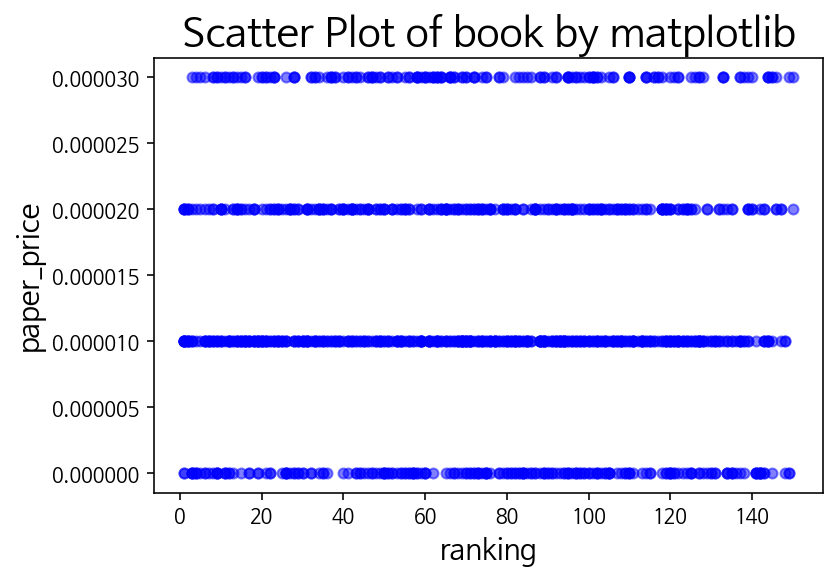

In [43]:
import matplotlib.pyplot as plt
plt.plot('ranking', 'paper_price', data=df5, linestyle='none', marker='o', markersize=5, color='blue', alpha=0.5)
plt.title('Scatter Plot of book by matplotlib', fontsize=20)
plt.xlabel('ranking', fontsize=14)

plt.ylabel('paper_price', fontsize=14)

plt.show()

#### ranking과 종이 당 단가의 유사성은 없음

#### 상관관계 조사

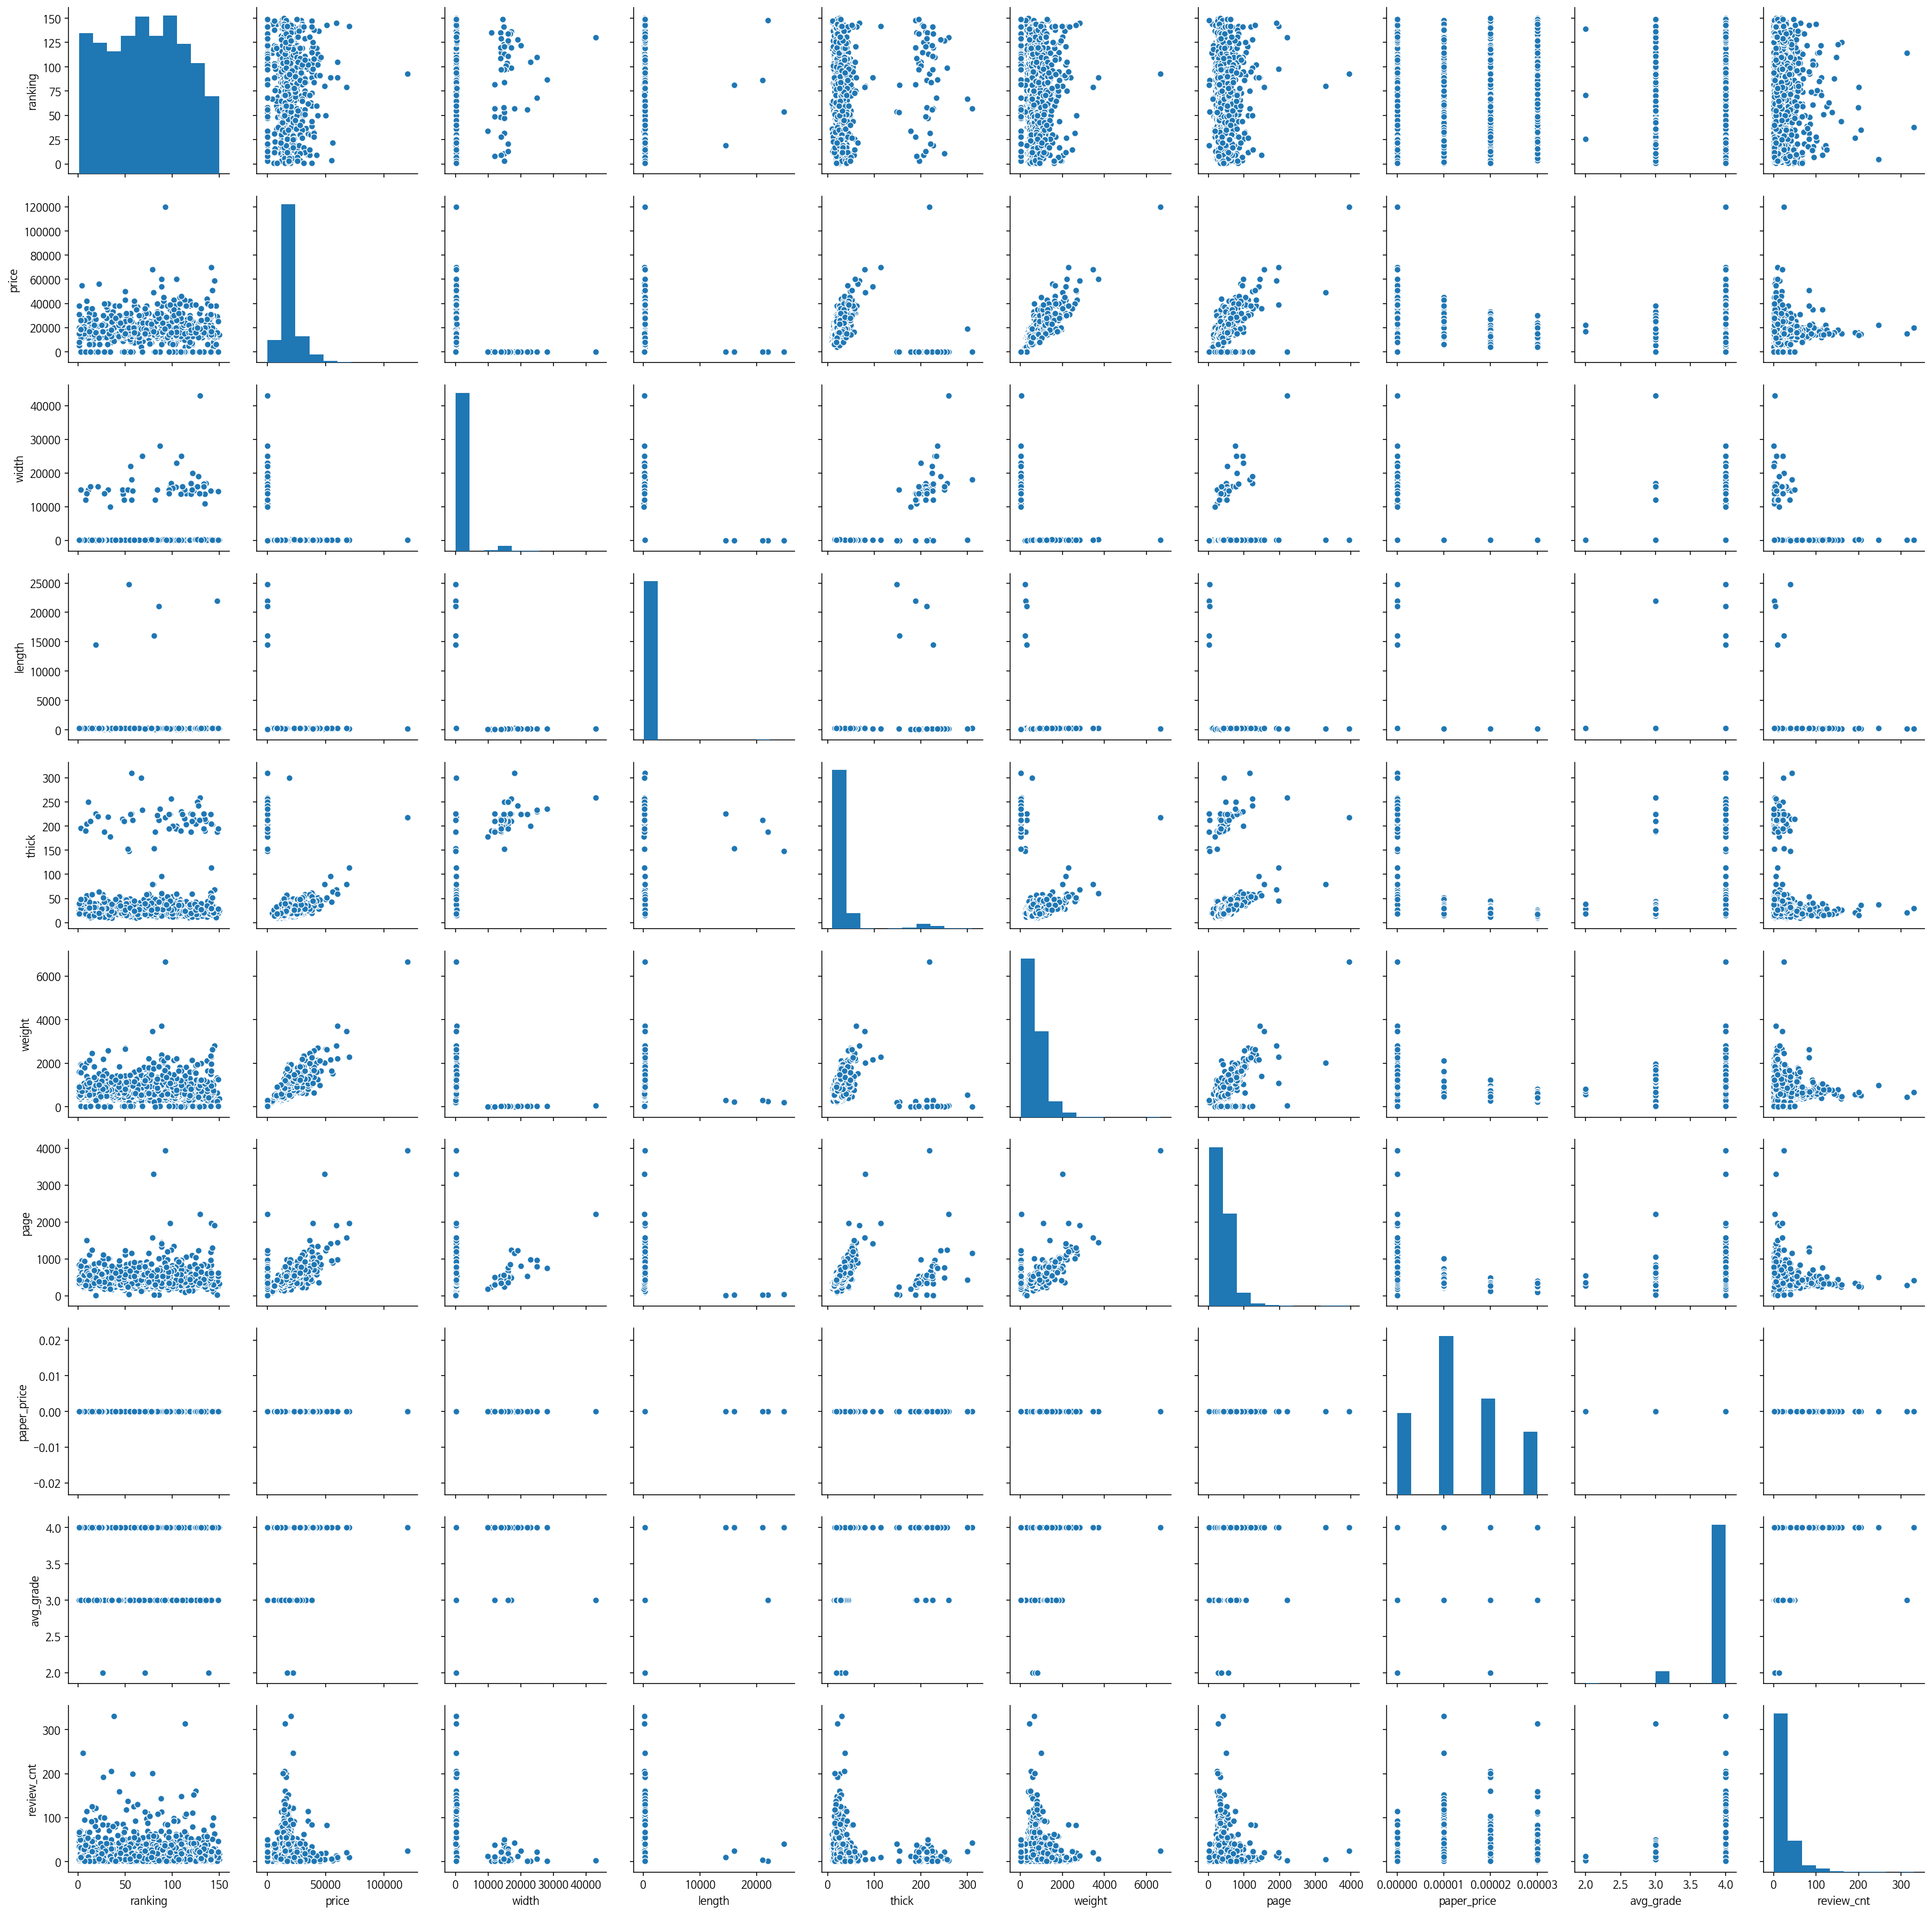

In [44]:
import seaborn as sns

sns.pairplot(df5[['ranking', 'price', 'width', 'length', 'thick', 'weight', 'page', 'paper_price', 'avg_grade', 'review_cnt']])
plt.show()

In [45]:
import statsmodels.api as sm

modelA = sm.OLS.from_formula("price ~ ranking + width + length + thick + weight + page + avg_grade + review_cnt", data=df5)
resultA = modelA.fit()
print(resultA.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     442.9
Date:                Tue, 23 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:38:31   Log-Likelihood:                -10755.
No. Observations:                1095   AIC:                         2.153e+04
Df Residuals:                    1086   BIC:                         2.157e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8330.7613   1971.021      4.227      0.0

### OLS 해석 
- price 와 rankig 은 상관 없음
- 두꺼울수록(thick) price가 높아지는 건 아님
- 페이지와 무게가 증가할수록(page, weigth) price 높아짐
- 가로 & 세로(width, length)가 증가한다고 price가 비싼 건 아님
- price와 평점(avg_grade) 상관 없음
- price와 리뷰 수는 음의 상관 관계로, price가 높아질수록 리뷰는 적음

### 결론

- price는 가로 세로 크기보다 무게와 페이지 수로 정한다
- price와 랭킹, 평점은 상관이 없다
- price가 비쌀수록 확실히 독자 참여가 적다(대중성이 떨어짐)